# **Práctica Bootcamp DeepLearning**

## **0.- Imports**

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, concatenate
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.regularizers import l2
import cv2
import imageio as io
from google.colab import drive

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

# **0.1.- Carga de datos**

In [3]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-02-19 11:15:49--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  54.31M  3.08MB/s    in 18s     

2023-02-19 11:16:11 (3.09 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [4]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Feb 19 11:15 .
drwxr-xr-x 1 root root 4.0K Feb 19 11:14 ..
-rw-r--r-- 1 root root  55M Feb 19 11:16 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Feb 17 19:29 .config
drwxr-xr-x 1 root root 4.0K Feb 17 19:30 sample_data


In [5]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire ho

In [6]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [7]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# **0.2.- Limpieza de datos**

Debido al análisis de datos realizado en el módulo anterior podemos descartar las siguientes columnas, por diferentes razones:

- De las imagenes unicamente nos quedamos con la de "Thumnail Url" para su uso en la segunda parte de la práctica.
- Todos los campos que comienzan por Host aportan información del Propietario y no de la propiedad.
- Scrape ID: no aporta información sobre la propiedad.
- Last Scraped: no aporta información sobre la propiedad.
- Weekly Price: información redundante que puede actuar como predictor
- Monthly Price: información redundante que puede actuar como predictor
- Calendar Updated: información irrelevante
- Calendar last Scraped: no aporta información sobre la propiedad.
- First review: no aporta información nueva; ya hay un dato de antiguedad del dueño.
- Last review: no aporta información nueva.
- Reviews per Month: no aporta información nueva
- Geolocation: es latitud + longitud
- Amenities, Features -> Texto abierto, necesitaría un tratamiento extra para darle valor
- Jurisdiction Names, License -> Tienen muchos NAN y hacen refencia a licencias, que se consideran relevantes para el precio
- Latitude y Longitude -> Posiciones geográficas, se cree que refiriendose a lo mismo afecta más el barrio. 

In [8]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count', 'Amenities', 'Features', 'Jurisdiction Names', 'License',
    'Latitude', 'Longitude'
]

data.drop(not_useful_columns, axis=1, inplace=True)

In [9]:
data.head()

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy
0,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,50.0,100.0,20.0,2,15,2,1125,NaN,13,24,42,66,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate
1,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,250.0,15.0,2,25,1,1125,NaN,15,42,72,347,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict
2,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...","Airport transfer for maximum 4 people, 30€ one...","El apartamento es muy céntrico, para visitar e...",Toda la casa,I will be happy to help you with whatever you ...,- Minimizar el ruido a partir de las 22:00 h. ...,https://a0.muscache.com/im/pictures/de09fac7-9...,2017-02-25,Spain,Hola a todos! Me llamo Luis Enrique y vivo en ...,within an hour,100.0,NaN,"email,phone,facebook,reviews,jumio,offline_gov...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,NaN,77.0,NaN,25.0,1,0,1,1125,NaN,7,34,64,155,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate
3,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-09,"Madrid, Madrid, Spain","Hola , mi nombre es Laura, soy Argentina y viv...",within a few hours,100.0,NaN,"email,phone,reviews,jumio,government_id","Embajadores, Madrid, Community of Madrid 28012...",Embajadores,Embajadores,Centro,Madrid,C

Más columnas que se pueden eliminar para el problema que queremos resolver_
- Name, Summary, Space, Description, Experiences Offered, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules -> Cadenas de texto abierto
- Host Location, Host About, Host Response Time, Host Response Rate, Host Acceptance Rate, Host Verifications -> Información del Propietario.

In [10]:
not_relevant_Columns=["Name", "Summary", "Space", "Description", "Experiences Offered", 
                      "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", 
                      "House Rules", "Host Location", "Host About", "Host Response Time", 
                      "Host Response Rate", "Host Acceptance Rate", "Host Verifications", "Host Since"]
data.drop(not_relevant_Columns, axis=1, inplace=True)

Columnas con información similar:
  - Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, ZipCode, Street. Nos quedamos Neighbourhood Cleansed que no tiene NAN
  - City, State, Market, Smart Location, Country Code, Country -> Se refieren todas a Madrid. Los registros que no sean de Madrid serán eliminados

In [11]:
not_relevant_Columns2=["Neighbourhood", "Neighbourhood Group Cleansed", "Zipcode", "Street", "City", "State", 
                      "Market", "Smart Location", "Country Code", "Country"]
data.drop(not_relevant_Columns2, axis=1, inplace=True)

Columnas con muchos missing values

In [12]:
columns_with_too_many_missing_values = ['Square Feet', 'Has Availability']

data.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

Reducción de columnas que continen información similar o redundante:
- Review Scores: Se hace una media de todos los scores.
- Availability: Nos quedamos con la 365.

In [13]:
reviews = data.loc[: , "Review Scores Rating":"Review Scores Value"]
data['Average Review'] = reviews.mean(axis=1)



In [14]:
data.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

Determinar el porcentaje de NA por columna.

In [15]:
def test_na_by_column(df):
    total = len(df)
    result = []
    for dfColumn in df.columns:
        result = result + [[dfColumn,(df[dfColumn].isna().sum()/total)*100 ]]
    
    print(sorted(result, key = lambda x: x[1], reverse=True))

test_na_by_column(data)

[['Security Deposit', 57.61731304906792], ['Cleaning Fee', 41.76844511106349], ['Average Review', 22.412684808227983], ['Thumbnail Url', 19.370044996785943], ['Bathrooms', 0.3714020427112349], ['Beds', 0.34997500178558677], ['Bedrooms', 0.17141632740518534], ['Price', 0.07856581672737661], ['Neighbourhood Cleansed', 0.0], ['Property Type', 0.0], ['Room Type', 0.0], ['Bed Type', 0.0], ['Guests Included', 0.0], ['Extra People', 0.0], ['Minimum Nights', 0.0], ['Maximum Nights', 0.0], ['Availability 365', 0.0], ['Number of Reviews', 0.0], ['Cancellation Policy', 0.0]]


Se entiende que si el Securit Deposit o el Cleaning Fee están vacíos, no tienen. Entonces se rellenan con 0.

In [16]:
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)

In [17]:
data.head()

,Thumbnail Url,Neighbourhood Cleansed,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review
0,https://a0.muscache.com/im/pictures/d1a2212d-c...,Embajadores,Loft,Entire home/apt,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,66,30,moderate,22.285714
1,https://a0.muscache.com/im/pictures/3eb59287-8...,Embajadores,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,347,97,strict,18.857143
2,https://a0.muscache.com/im/pictures/de09fac7-9...,Embajadores,Apartment,Entire home/apt,1.5,1.0,2.0,Real Bed,77.0,0.0,25.0,1,0,1,1125,155,7,moderate,21.000000
3,NaN,Embajadores,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,191,6,strict,21.285714
4,https://a0.muscache.com/im/pictures/6136974/57...,Embajadores,Apartment,Entire home/apt,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,237,72,strict,22.428571


**Variables Categóricas**

In [18]:
list(data.select_dtypes(include=['object']).columns)

['Thumbnail Url',
 'Neighbourhood Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [19]:
categorical = ['Neighbourhood Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)    

# **0.3.- Carga de imágenes**

In [20]:
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        img_resized = cv2.resize(img, (224, 224))
        if img_resized.shape == (224,224,3):
          images[i_aux] = img_resized
          good_urls.append(i_img)
          i_aux += 1
          print(f'Imagen {i_img} descargada')
          print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 4 descargada
4
Imagen 7 descargada
5
Imagen 11 descargada
6
Imagen 13 descargada
7
Imagen 15 descargada
8
Imagen 16 descargada
9
Imagen 17 descargada
10
Imagen 21 descargada
11
Imagen 23 descargada
12
Imagen 24 descargada
13
Imagen 25 descargada
14
Imagen 26 descargada
15
Imagen 27 descargada
16
Imagen 29 descargada
17
Imagen 30 descargada
18
Imagen 31 descargada
19
Imagen 32 descargada
20
Imagen 34 descargada
21
Imagen 35 descargada
22
Imagen 36 descargada
23
Imagen 37 descargada
24
Imagen 38 descargada
25
Imagen 39 descargada
26
Imagen 40 descargada
27
Imagen 41 descargada
28
Imagen 43 descargada
29
Imagen 45 descargada
30
Imagen 46 descargada
31
Imagen 47 descargada
32
Imagen 48 descargada
33
Imagen 52 descargada
34
Imagen 54 descargada
35
Imagen 55 descargada
36
Imagen 56 descargada
37
Imagen 57 descargada
38
Imagen 58 descargada
39
Imagen 59 descargada
40
Imagen 60 descargada
41
Imagen 61 descargada
42
Imagen

Los precios por encima de 300€ se consideran outliers y se eliminan

In [21]:
data = data[data.Price < 300]

In [22]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


Se eliminan los registros que tengan alguno de sus valores null o NAN. Se va a hacer un estudio limitado a 1000 registros máximo.

In [23]:
data = data.dropna(how='any',axis=0) 

In [24]:
data.shape

(8770, 19)

In [25]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data.iloc[good_urls, :]

In [26]:
print(final_data.shape)

(1000, 19)


In [28]:
# Obtener las etiquetas de regresion
# y_reg = final_data['Price']

In [27]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)

In [4]:
# montamos GDrive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
!ls -lah drive/MyDrive/

total 243M
-rw------- 1 root root 4.8M Dec  3  2020  1606986115846.jpg
-rw------- 1 root root 3.6M May  5  2021  1620223613014.jpg
-rw------- 1 root root 4.5M May  5  2021  1620223613023.jpg
-rw------- 1 root root  176 May 19  2015 '20150519 (1).gsheet'
-rw------- 1 root root  176 May 19  2015 '20150519 (2).gsheet'
-rw------- 1 root root  176 May 19  2015 '20150519 (3).gsheet'
-rw------- 1 root root  331 May 19  2015  20150519.CSV
-rw------- 1 root root  176 May 20  2015  20150519.gsheet
-rw------- 1 root root 3.5K May 20  2015 '20150520 (1).CSV'
-rw------- 1 root root 8.1K May 23  2015  20150520.CSV
-rw------- 1 root root  176 May 20  2015  20150520.gsheet
-rw------- 1 root root  350 May 23  2015  20150521.CSV
-rw------- 1 root root  25K Sep  1 14:49 '2022-09-01 - Propuesta App móvil.docx'
-rw------- 1 root root  39K Jul 15  2021  3012222143589481_payment.pdf
-rw------- 1 root root  38K Jul 15  2021  3012222143619481_payment.pdf
-rw------- 1 root root 623K Dec 22 15:02 'analítica 20

In [5]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/My\ Drive/images.npy
!cp final_data.npy /content/drive/My\ Drive/final_data.npy

cp: cannot stat 'images.npy': No such file or directory
cp: cannot stat 'final_data.npy': No such file or directory


In [30]:
!ls -lah images.npy final_data.npy

-rw-r--r-- 1 root root 216K Feb 19 11:28 final_data.npy
-rw-r--r-- 1 root root 144M Feb 19 11:28 images.npy


**Carga de datos ya procesados desde nuestro drive**

In [2]:
drive.mount('/content/drive')
images = np.load('drive/MyDrive/images.npy', allow_pickle=True)
final_data = pd.DataFrame(np.load('drive/MyDrive/final_data.npy', allow_pickle=True), columns=["Thumbnail Url",	"Neighbourhood Cleansed",	"Property Type",	"Room Type",	"Bathrooms",	"Bedrooms",	"Beds",	"Bed Type",	"Price",	"Security Deposit",	"Cleaning Fee",	"Guests Included",	"Extra People",	"Minimum Nights",	"Maximum Nights",	"Availability 365",	"Number of Reviews",	"Cancellation Policy", "Average Review"])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
final_data.shape

(1000, 19)

In [4]:
final_data.head()

,Thumbnail Url,Neighbourhood Cleansed,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review
0,https://a0.muscache.com/im/pictures/d1a2212d-c...,60.323593,73.766323,92.725863,1.0,0.0,1.0,71.920897,50.0,100.0,20.0,2,15,2,1125,66,30,63.181908,22.285714
1,https://a0.muscache.com/im/pictures/3eb59287-8...,60.323593,70.207901,92.725863,1.0,1.0,2.0,71.920897,50.0,250.0,15.0,2,25,1,1125,347,97,83.579707,18.857143
2,https://a0.muscache.com/im/pictures/de09fac7-9...,60.323593,70.207901,92.725863,1.5,1.0,2.0,71.920897,77.0,0.0,25.0,1,0,1,1125,155,7,63.181908,21.0
3,https://a0.muscache.com/im/pictures/cf350e03-c...,60.323593,70.207901,38.85671,1.5,1.0,1.0,71.920897,30.0,0.0,0.0,1,0,1,1125,0,2,63.181908,18.571429
4,https://a0.muscache.com/im/pictures/f22f1505-f...,60.323593,70.207901,38.85671,1.0,1.0,1.0,71.920897,37.0,0.0,20.0,1,0,3,15,333,14,83.579707,22.0


In [5]:
images.shape

(1000, 224, 224, 3)

# **1.- Estudio**

**Normalización del valor a predecir**

In [6]:
# Obtener las etiquetas de regresion
y = final_data['Price'].astype(float)
max_y = np.max(y)
print(max_y)

299.0


In [7]:
y_norm = y/max_y

Se comprueba como han quedao los datos en Y

In [8]:
y.head()

0    50.0
1    50.0
2    77.0
3    30.0
4    37.0
Name: Price, dtype: float64

In [9]:
y_norm.head()

0    0.167224
1    0.167224
2    0.257525
3    0.100334
4    0.123746
Name: Price, dtype: float64

Eliminamos la columna Thumnail Url ya que tenemos las imagenes guardadas en el fichero images

In [10]:
# x_images = final_data['Thumbnail Url']
x=final_data.loc[:,final_data.columns != "Thumbnail Url"]

In [11]:
x.dtypes

Neighbourhood Cleansed    object
Property Type             object
Room Type                 object
Bathrooms                 object
Bedrooms                  object
Beds                      object
Bed Type                  object
Price                     object
Security Deposit          object
Cleaning Fee              object
Guests Included           object
Extra People              object
Minimum Nights            object
Maximum Nights            object
Availability 365          object
Number of Reviews         object
Cancellation Policy       object
Average Review            object
dtype: object

Pasar variables a float

In [12]:
x = x.astype(float) 

In [13]:
x.dtypes

Neighbourhood Cleansed    float64
Property Type             float64
Room Type                 float64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Bed Type                  float64
Price                     float64
Security Deposit          float64
Cleaning Fee              float64
Guests Included           float64
Extra People              float64
Minimum Nights            float64
Maximum Nights            float64
Availability 365          float64
Number of Reviews         float64
Cancellation Policy       float64
Average Review            float64
dtype: object

Se elimina la columna a predecir de x

In [14]:
x=x.loc[:,x.columns != "Price"]

In [15]:
x.head()

,Neighbourhood Cleansed,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review
0,60.323593,73.766323,92.725863,1.0,0.0,1.0,71.920897,100.0,20.0,2.0,15.0,2.0,1125.0,66.0,30.0,63.181908,22.285714
1,60.323593,70.207901,92.725863,1.0,1.0,2.0,71.920897,250.0,15.0,2.0,25.0,1.0,1125.0,347.0,97.0,83.579707,18.857143
2,60.323593,70.207901,92.725863,1.5,1.0,2.0,71.920897,0.0,25.0,1.0,0.0,1.0,1125.0,155.0,7.0,63.181908,21.000000
3,60.323593,70.207901,38.856710,1.5,1.0,1.0,71.920897,0.0,0.0,1.0,0.0,1.0,1125.0,0.0,2.0,63.181908,18.571429
4,60.323593,70.207901,38.856710,1.0,1.0,1.0,71.920897,0.0,20.0,1.0,0.0,3.0,15.0,333.0,14.0,83.579707,22.000000


**Normalización de los datos numéricos**

In [16]:
columnsToNormalize = columns=["Neighbourhood Cleansed",	"Property Type",	"Room Type",	"Bathrooms",	"Bedrooms",	"Beds",	"Bed Type",	"Security Deposit",	"Cleaning Fee",	"Guests Included",	"Extra People",	"Minimum Nights",	"Maximum Nights",	"Availability 365",	"Number of Reviews",	"Cancellation Policy", "Average Review"]
cs = MinMaxScaler()
x = cs.fit_transform(x[columnsToNormalize])

**Funciones de ayuda**

Se crean funciones comunes para clarificar el código:


* Desnormalizar los resultados
* Dibujar graficas
* Resetar los pesos de modelo



In [17]:
def plot_model_result(H, epoch):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epoch), H.history["mse"], label="train_mse")
  plt.plot(np.arange(0, epoch), H.history["val_mse"], label="val_mse")
  plt.title("Training MSE")
  plt.xlabel("Epoch #")
  plt.ylabel("MSE")
  plt.legend()

In [18]:
# Desnormalizar y calculo del error que en este caso es la diferencia entre la preccion y valor real
def extract_result (predictions, real, max_real):
  diff = predictions.flatten() * max_real - real * max_real
  mean = np.mean(np.abs(diff))
  std = np.std(np.abs(diff))
  return mean, std

In [19]:
def save_model_weights(model, dst):
  model.save_weights(dst)

def load_model_weights(model, src):
  model.load_weights(src)

In [20]:
# Función para ejecutar el modelo con diferentes parámetros
def execute_model_with_params(model_to_run, lr, epoch, batch, weights):
  # Cargar los pesos iniciales
  load_model_weights(model_to_run, weights)

  # Entrenamos el modelo
  H = model_to_run.fit(x_train_mod_2, to_categorical(y_train_mod_2),
            batch_size=batch,
            shuffle=True,
            epochs=epoch,
            validation_data=(x_val_mod_2, to_categorical(y_val_mod_2)))

  # Predicciones 
  predictions = model_to_run.predict(x_test_mod_2, batch_size=batch) 

  return H, predictions

## **1.1.- Módulo 1. Basado en datos**


**Split de los datos**

In [21]:
x_train_mod_1, x_test_mod_1, y_train_mod_1, y_test_mod_1 = train_test_split(x, y_norm, test_size=0.25, random_state=42)

In [22]:
x_train_mod_1, x_val_mod_1, y_train_mod_1, y_val_mod_1 = train_test_split(x_train_mod_1, y_train_mod_1, test_size=0.15, random_state=42)

In [23]:
print("El conjunto de entrenamiento tiene dimensiones: ", x_train_mod_1.shape)
print("El conjunto de validación tiene dimensiones: ",x_val_mod_1.shape)
print("El conjunto de test tiene dimensiones: ",x_test_mod_1.shape)

El conjunto de entrenamiento tiene dimensiones:  (637, 17)
El conjunto de validación tiene dimensiones:  (113, 17)
El conjunto de test tiene dimensiones:  (250, 17)


Se ha optado por esta configuración de red neuronal por las siguientes razones:


* La primera capa con un input_size = al número de variables que tenemos para el modelo. Como es un problema de regresión se usa la función de activación "Sigmoide"
* Segunda capa reduciendo a la mitad, aproximadamente del número de neuronas de la capa anterior y como función de activación "Sigmoide"
* Tercera capa, como lo que se pretende predecir el precio entonces se utilizará una única neurona y sin función de activación o la función "linear"

Por otro lado, al tratarse de un problema de regresión se utiiza como función de pérdidas "MSE"

Posteriormente se calcula la diferencia entre la prediccion y el valor real y se saca una media del error cometido y su desviación estandard.





Se han probado diferentes valores para los parámetros y los que mejores resultados he obtenido son los siguientes:

* Learning Rate: 0.001
* Número de épocas: 20
* Batch Size: 50



In [24]:
# Implementamos la red empleando Keras
# Parámetros de optimización
lr1 = 0.001

# Definición del modelo
model1 = Sequential() # Instancia de modelo API secuencial #(X)
model1.add(Dense(17, input_shape=(17,), activation="sigmoid"))
model1.add(Dense(8, activation="sigmoid") )
model1.add(Dense(1, activation="linear") )

# Compilamos y entrenamos el modelo utilizando el optimizador SGD
model1.compile(loss="mse", optimizer=SGD(lr1), metrics=["mse"])  #(X)

# Guardar los pesos iniciales para poder resetear el modelo
save_model_weights(model1, "model1.weights")

In [25]:
n_epochs1 = 20
batch_size1= 50

# Cargar los pesos iniciales
load_model_weights(model1, "model1.weights")

# Entrenando la solución
H1 = model1.fit(x_train_mod_1, y_train_mod_1, validation_data=(x_val_mod_1, y_val_mod_1), epochs=n_epochs1, batch_size=batch_size1)  #(X)
model1.summary()
# Evaluando el modelo de predicción con las imágenes de test
predictions1 = model1.predict(x_test_mod_1, batch_size=batch_size1) 




Epoch 1/20
13/13 [==============================] - 2s 18ms/step - loss: 0.7866 - mse: 0.7866 - val_loss: 0.7143 - val_mse: 0.7143
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6445 - mse: 0.6445 - val_loss: 0.5868 - val_mse: 0.5868
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5293 - mse: 0.5293 - val_loss: 0.4833 - val_mse: 0.4833
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.4358 - mse: 0.4358 - val_loss: 0.3992 - val_mse: 0.3992
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3598 - mse: 0.3598 - val_loss: 0.3305 - val_mse: 0.3305
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.2977 - mse: 0.2977 - val_loss: 0.2746 - val_mse: 0.2746
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 0.2058 - mse: 0.2

In [26]:
# Desnormalizar y calcular la diferencia
mean1, std1 = extract_result(predictions1, y_test_mod_1, max_y)

print("Error medio: ", mean1, "€")
print("Desviación standard: ", std1, "€")

Error medio:  36.18062399673462 €
Desviación standard:  36.45834559213566 €


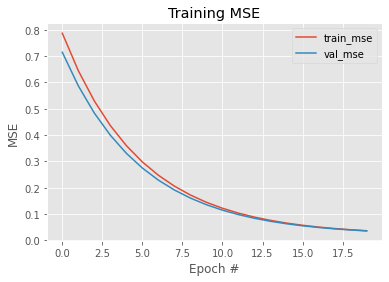

In [27]:
plot_model_result(H1, n_epochs1)

## **1.2.- Módulo 1. Basado en imágenes**


Se cargan las imágenes en una variable x

In [28]:
x_mod_2 = images

In [29]:
x_mod_2.shape

(1000, 224, 224, 3)

**Redimensionamiento y normalización**

Redimensionamiento y normalizacion de las imagenes. Se cambian a un tamaño de 32,32,3 por optimizaciones de memoria. La normalizacion se realiza dividiendo entre 255 ya que es el valor máximo por canal de una imagen RGB

In [30]:
input_shape = (32, 32, 3)
# resize train set
x_mod_2_resized = np.zeros((x_mod_2.shape[0], 32, 32, 3))
for idx, img in enumerate(x_mod_2):
  # Resize
  img_resized = cv2.resize(img, (32, 32))
  # Normalizacion
  x_mod_2_resized[idx] =img_resized / 255

**Split de los datos**

In [31]:
x_train_mod_2, x_test_mod_2, y_train_mod_2, y_test_mod_2 = train_test_split(x_mod_2_resized, y_norm, test_size=0.25, random_state=42)

In [32]:
x_train_mod_2, x_val_mod_2, y_train_mod_2, y_val_mod_2 = train_test_split(x_train_mod_2, y_train_mod_2, test_size=0.15, random_state=42)

In [33]:
print("El conjunto de entrenamiento tiene dimensiones: ", x_train_mod_2.shape , ", y:", y_train_mod_2.shape)
print("El conjunto de validación tiene dimensiones: ",x_val_mod_2.shape, ", y:", y_val_mod_2.shape)
print("El conjunto de test tiene dimensiones: ",x_test_mod_2.shape, ", y:", y_test_mod_2.shape)

El conjunto de entrenamiento tiene dimensiones:  (637, 32, 32, 3) , y: (637,)
El conjunto de validación tiene dimensiones:  (113, 32, 32, 3) , y: (113,)
El conjunto de test tiene dimensiones:  (250, 32, 32, 3) , y: (250,)


Visualizar alguna imagen

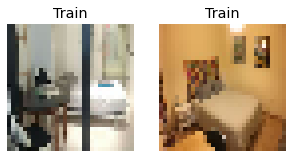

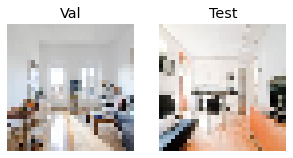

In [34]:
img_train1 = x_train_mod_2[5]
img_train2 = x_train_mod_2[1]
img_val1 = x_val_mod_2[3]
img_test1 =  x_test_mod_2[1]


fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(5, 5))
ax_orig.imshow(img_train1)
ax_orig.set_title('Train')
ax_orig.set_axis_off()
ax_mag.imshow(img_train2)
ax_mag.set_title('Train')
ax_mag.set_axis_off()

fig, (ax_orig, ax_mag) = plt.subplots(1, 2, figsize=(5, 5))
ax_orig.imshow(img_val1)
ax_orig.set_title('Val')
ax_orig.set_axis_off()
ax_mag.imshow(img_test1)
ax_mag.set_title('Test')
ax_mag.set_axis_off()

**Creación del modelo**

In [35]:
# Implementamos la red from scratch empleando Keras
# Learning rate
lr2 = 0.001

# Definición del modelo
model2 = Sequential()

# Definimos una capa convolucional. Se añade el padding a las imagenes
model2.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid', input_shape=input_shape, padding="same"))

# Definimos una segunda capa convolucional
model2.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid', padding="same"))

# Definimos una tercera capa convolucional
model2.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid', padding="same"))

# Aplanar los datos
model2.add(Flatten())

# Añadimos las capas densas intermedias con la funcion de activacion relu
model2.add(Dense(1024, activation='sigmoid'))
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dense(256, activation='sigmoid'))
# Como queremos predecir el precio ponemos como salida una única neurona
model2.add(Dense(1))

# Compilamos el modelo con el optimizador Adam
model2.compile(loss='mse',optimizer=Adam(learning_rate=lr2), metrics=["mse"])

# Guardar los pesos iniciales para poder resetear el modelo
save_model_weights(model2, "model2.weights")

**Primera prueba**

In [36]:
n_epochs2 = 10
batch_size2= 8
H2, predictions2 = execute_model_with_params(model2, lr2, n_epochs2, batch_size2, "model2.weights")

Epoch 1/10
80/80 [==============================] - 8s 37ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.2636 - val_mse: 0.2636
Epoch 2/10
80/80 [==============================] - 3s 33ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 3/10
80/80 [==============================] - 3s 34ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 4/10
80/80 [==============================] - 3s 36ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 5/10
80/80 [==============================] - 3s 33ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 6/10
80/80 [==============================] - 3s 34ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 7/10
80/80 [==============================] - 3s 34ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 8/10
80/80 [==============================] - 3s 33ms/step - loss: 0.2500 - m

In [37]:
# Desnormalizar y calculo del error que en este caso es la diferencia entre la preccion y valor real
mean2, std2 = extract_result(predictions2, y_test_mod_2, max_y)
print("Error medio: ", mean2, "€")
print("Desviación standard: ", std2, "€")

Error medio:  93.25999963378906 €
Desviación standard:  31.171499959288624 €


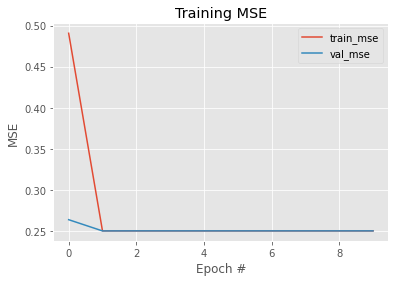

In [38]:
plot_model_result(H2,n_epochs2)

Se intenta mejorar el modelo modificando los parámetros de entrada

**Segunda prueba**

In [39]:
n_epochs3 = 12
batch_size3 = 75
H3, predictions3 = execute_model_with_params(model2, lr2, n_epochs3, batch_size3, "model2.weights")

Epoch 1/12
9/9 [==============================] - 1s 114ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.5614 - val_mse: 0.5614
Epoch 2/12
9/9 [==============================] - 1s 64ms/step - loss: 0.3429 - mse: 0.3429 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 3/12
9/9 [==============================] - 1s 68ms/step - loss: 0.2851 - mse: 0.2851 - val_loss: 0.2792 - val_mse: 0.2792
Epoch 4/12
9/9 [==============================] - 1s 64ms/step - loss: 0.2601 - mse: 0.2601 - val_loss: 0.3639 - val_mse: 0.3639
Epoch 5/12
9/9 [==============================] - 1s 68ms/step - loss: 0.2561 - mse: 0.2561 - val_loss: 0.1977 - val_mse: 0.1977
Epoch 6/12
9/9 [==============================] - 1s 64ms/step - loss: 0.2517 - mse: 0.2517 - val_loss: 0.2225 - val_mse: 0.2225
Epoch 7/12
9/9 [==============================] - 1s 68ms/step - loss: 0.2509 - mse: 0.2509 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 8/12
9/9 [==============================] - 1s 63ms/step - loss: 0.2503 - mse: 0.2503 - va

In [40]:
# Desnormalizar y calculo del error que en este caso es la diferencia entre la preccion y valor real
mean3, std3 = extract_result(predictions3, y_test_mod_2, max_y)
print("Error medio: ", mean3, "€")
print("Desviación standard: ", std3, "€")

Error medio:  93.29760797119141 €
Desviación standard:  31.176566489829227 €


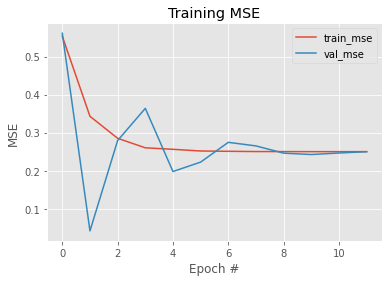

In [41]:
plot_model_result(H3,n_epochs3)

**Tercera Prueba**

Como se Observa que no se mejora mucho con el modelo actual, se decide crear un nuevo modelo con varios bloques convulacionales más y un GolbalMaxPooling

In [42]:
# Implementamos la red from scratch empleando Keras
lr4 = 0.01


if 'model3' in locals() or 'model3' in globals():
  del model3

# Definición del modelo
model3 = Sequential()

# Definimos una capa convolucional. Se añade el padding a las imagenes
model3.add(Conv2D(128, kernel_size=(3, 3), input_shape=input_shape, padding="same"))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model3.add(Conv2D(128, kernel_size=(3, 3), padding="same"))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model3.add(Conv2D(128, kernel_size=(3, 3), padding="same"))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(0.25))

# Como queremos predecir el precio ponemos como salida una única neurona
model3.add(GlobalMaxPooling2D())
model3.add(Dense(1, activation="linear"))

# Compilamos el modelo con el optimizador Adam
model3.compile(loss='mse',optimizer=Adam(learning_rate=lr4), metrics=["mse"])

# Guardar los pesos iniciales para poder resetear el modelo
save_model_weights(model3, "model3.weights")

In [43]:
n_epochs4 = 50
batch_size4 = 150
H4, predictions4 = execute_model_with_params(model3, lr4, n_epochs4, batch_size4, "model3.weights")

Epoch 1/50
5/5 [==============================] - 5s 195ms/step - loss: 109.5382 - mse: 109.5382 - val_loss: 16287.8496 - val_mse: 16287.8496
Epoch 2/50
5/5 [==============================] - 0s 83ms/step - loss: 7.9958 - mse: 7.9958 - val_loss: 9241.2236 - val_mse: 9241.2236
Epoch 3/50
5/5 [==============================] - 0s 84ms/step - loss: 2.8239 - mse: 2.8239 - val_loss: 2784.9314 - val_mse: 2784.9314
Epoch 4/50
5/5 [==============================] - 0s 85ms/step - loss: 1.6967 - mse: 1.6967 - val_loss: 1084.8785 - val_mse: 1084.8785
Epoch 5/50
5/5 [==============================] - 0s 83ms/step - loss: 1.1635 - mse: 1.1635 - val_loss: 516.7003 - val_mse: 516.7003
Epoch 6/50
5/5 [==============================] - 0s 85ms/step - loss: 1.0045 - mse: 1.0045 - val_loss: 245.7573 - val_mse: 245.7573
Epoch 7/50
5/5 [==============================] - 0s 84ms/step - loss: 0.8578 - mse: 0.8578 - val_loss: 151.4787 - val_mse: 151.4787
Epoch 8/50
5/5 [==============================] - 0s 8

In [44]:
# Desnormalizar y calculo del error que en este caso es la diferencia entre la preccion y valor real
mean4, std4 = extract_result(predictions4, y_test_mod_2, max_y)
print("Error medio: ", mean4, "€")
print("Desviación standard: ", std4, "€")

Error medio:  57.31088137102127 €
Desviación standard:  49.223709734954134 €


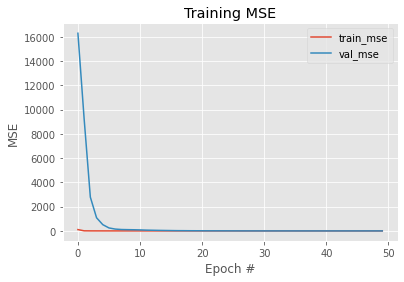

In [45]:
plot_model_result(H4,n_epochs4)

Los resultados no son muy buenos. Se debería intentar con otro modelo basado en VGG y hacer fine tuning para adaptarlo a regresion.

## **2.- Módulo 2. Modelo híbrido**

Me creo dos modelos copia de los anteriores, pero sin la ultima capa, para construir el modelo hibrido.

In [46]:
# Modelo para los datos
# Definición del modelo
model_h1D = Sequential() # Instancia de modelo API secuencial #(X)
model_h1D.add(Dense(17, input_shape=(17,), activation="sigmoid"))
model_h1D.add(Dense(8, activation="sigmoid") )

In [47]:
# Modelo para las imagenes
# Definición del modelo
model_h2D = Sequential()

# Definimos una capa convolucional. Se añade el padding a las imagenes
model_h2D.add(Conv2D(128, kernel_size=(3, 3), input_shape=input_shape, padding="same"))
model_h2D.add(BatchNormalization())
model_h2D.add(Activation("relu"))
model_h2D.add(Dropout(0.25))

# Definimos una segunda capa convolucional
model_h2D.add(Conv2D(128, kernel_size=(3, 3), padding="same"))
model_h2D.add(BatchNormalization())
model_h2D.add(Activation("relu"))
model_h2D.add(Dropout(0.25))

# Definimos una tercera capa convolucional
model_h2D.add(Conv2D(128, kernel_size=(3, 3), padding="same"))
model_h2D.add(BatchNormalization())
model_h2D.add(Activation("relu"))
model_h2D.add(Dropout(0.25))

# Max Pooling
model_h2D.add(GlobalMaxPooling2D())

# Una densa para adaptar la salida al modelo anterior
model_h2D.add(Dense(8, activation="relu"))

In [48]:
# Creación del modelo híbrido
combinedInput = concatenate([model_h1D.output, model_h2D.output])

model_h_l0 = Dense(8, activation="sigmoid")(combinedInput)
model_h_l1 = Dense(4, activation="sigmoid")(model_h_l0)
model_h_l2 = Dense(1, activation="linear")(model_h_l1)

model_h = Model(inputs=[model_h1D.input, model_h2D.input], outputs=model_h_l2)

In [49]:
# Learning Rate
lr_h = 0.01

# Compilamos el modelo con el optimizador Adam
model_h.compile(loss='mse',optimizer=Adam(learning_rate=lr_h), metrics=["mse"])
model_h.summary()

save_model_weights(model_h, "model_h.weights")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_6_input (InputLayer)    [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 128)  3584        ['conv2d_6_input[0][0]']         
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 32, 32, 128)  512        ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_3 (Activation)      (None, 32, 32, 128)  0           ['batch_normalization_3[0][0]

In [56]:
# Ejecucion del modelo
n_epochs_h1 = 60
batch_size_h1 = 90

# Cargamos los pesos iniciales
load_model_weights(model_h, "model_h.weights")

# Entrenamos el modelo
H_h1 = model_h.fit([x_train_mod_1, x_train_mod_2], to_categorical(y_train_mod_1),
          batch_size=batch_size_h1,
          shuffle=True,
          epochs=n_epochs_h1,
          validation_data=([x_val_mod_1, x_val_mod_2], to_categorical(y_val_mod_1)))

# Predicciones 
predictions_h1 = model_h.predict([x_test_mod_1, x_test_mod_2], batch_size=batch_size_h1) 

Epoch 1/60
8/8 [==============================] - 1s 95ms/step - loss: 0.2704 - mse: 0.2704 - val_loss: 0.2535 - val_mse: 0.2535
Epoch 2/60
8/8 [==============================] - 0s 55ms/step - loss: 0.2503 - mse: 0.2503 - val_loss: 0.2435 - val_mse: 0.2435
Epoch 3/60
8/8 [==============================] - 0s 57ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2526 - val_mse: 0.2526
Epoch 4/60
8/8 [==============================] - 0s 56ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2518 - val_mse: 0.2518
Epoch 5/60
8/8 [==============================] - 0s 56ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2479 - val_mse: 0.2479
Epoch 6/60
8/8 [==============================] - 0s 56ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2506 - val_mse: 0.2506
Epoch 7/60
8/8 [==============================] - 0s 55ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2505 - val_mse: 0.2505
Epoch 8/60
8/8 [==============================] - 0s 63ms/step - loss: 0.2500 - mse: 0.2500 - val

In [57]:
# Desnormalizar y calculo del error que en este caso es la diferencia entre la preccion y valor real
mean_h1, std_h1 = extract_result(predictions_h1, y_test_mod_1, max_y)
print("Error medio: ", mean_h1, "€")
print("Desviación standard: ", std_h1, "€")

Error medio:  93.16719244384765 €
Desviación standard:  31.165291174224 €


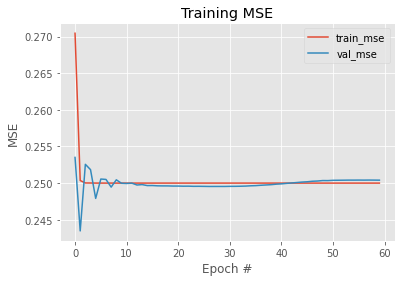

In [58]:
plot_model_result(H_h1,n_epochs_h1)

Habría que seguir optimizando los parámetros del modelo para obtener mejores resultados. Lo primero que se debería de hacer es mejorar el modelo basado en imágenes.